[ベイズ最適化入門](https://qiita.com/masasora/items/cc2f10cb79f8c0a6bbaa)  
https://github.com/Ma-sa-ue/practice/blob/master/machine%20learning(python)/bayeisan_optimization.ipynb  
The original code is based on python2.
A few modifications to fit it to python3 are needed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import sys

np.random.seed(seed=123)

%matplotlib inline

In [2]:
def xx2K(xn,xm,a1=200.0,a2=20.0,a3=1.0,a4=10.0):
    if (len(xn) == 1):
        K = np.zeros([1,len(xm)])
    else :
        K = 0.0*np.outer(xn,xm)
    for i in range(len(xn)):
        K[i,:] = a1*np.exp(-(xn[i] - xm[:])**2/a2)
    return K

def _xsample2meanvariance(_xsample, _ysample, _x):
    eps = 1.0e-10
    K = xx2K(_xsample,_xsample) + eps*np.eye(len(_xsample))
    L = np.linalg.cholesky(K)
    #plt.matshow(K)
    #plt.matshow(L)
    kast = xx2K(_xsample,_x)
    kastast = xx2K(_x,_x)
    w = np.linalg.solve(L, _ysample)
    z = np.linalg.solve(L.T, w)
    fmean = np.dot(kast.T, z)
    W = np.linalg.solve(L, kast)
    Z = np.linalg.solve(L.T, W)
    fvariance = kastast - np.dot(kast.T, Z)
    fvariance = np.diag(fvariance)
    fstd = np.sqrt(fvariance)
    return fmean, fstd

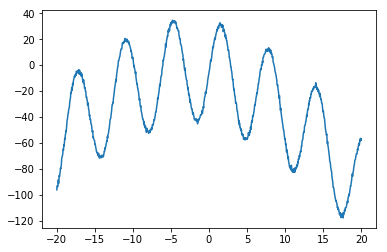

In [3]:
def generate_sample(x):
    return 40.0*np.sin(x/1.0) - (0.3*(x+6.0))**2 - (0.2*(x-4.0))**2 - 1.0*np.abs(x+2.0) + np.random.normal(0,1,1)

x = np.linspace(-20,20,1000)
z = list(map(generate_sample,x)) #for python3 
#z = generate_sample(x)
plt.plot(x, z) #### plot true data
plt.show()
#sys.exit()

#### PI
def aqui2(_mean, _std, _maxval):
    _lamb = (_mean -  _maxval- 0.01)/(_std*1.0)
    _z = norm.cdf(_lamb)
    return _z

#### EI
def aqui1(_mean, _std, _maxval):
    _lamb = (_mean -  _maxval)/(_std*1.0)
    _z = (_mean - maxval)*norm.cdf(_lamb) + _std*norm.pdf(_lamb)
    return _z

#### UCB
def aqui3(_mean, _std, _maxval):
    return _mean+1.0*_std

x_point, maxval = 9.68836939984255,  Initial
x_point, maxval = [-20.00614447],  -46.090564309299886
x_point, maxval = [-4.89835756],  -46.090564309299886
x_point, maxval = [-3.3810555],  33.03723672071452
x_point, maxval = [-6.90532026],  33.03723672071452
x_point, maxval = [-4.78907358],  33.03723672071452
x_point, maxval = [-11.71727411],  34.987524195804184
x_point, maxval = [-4.45519272],  34.987524195804184
x_point, maxval = [1.69517112],  34.987524195804184
x_point, maxval = [-9.90291842],  34.987524195804184
x_point, maxval = [-15.51512639],  34.987524195804184
x_point, maxval = [0.06192592],  34.987524195804184
x_point, maxval = [5.62406289],  34.987524195804184
x_point, maxval = [12.4359239],  34.987524195804184
x_point, maxval = [-13.9130101],  34.987524195804184


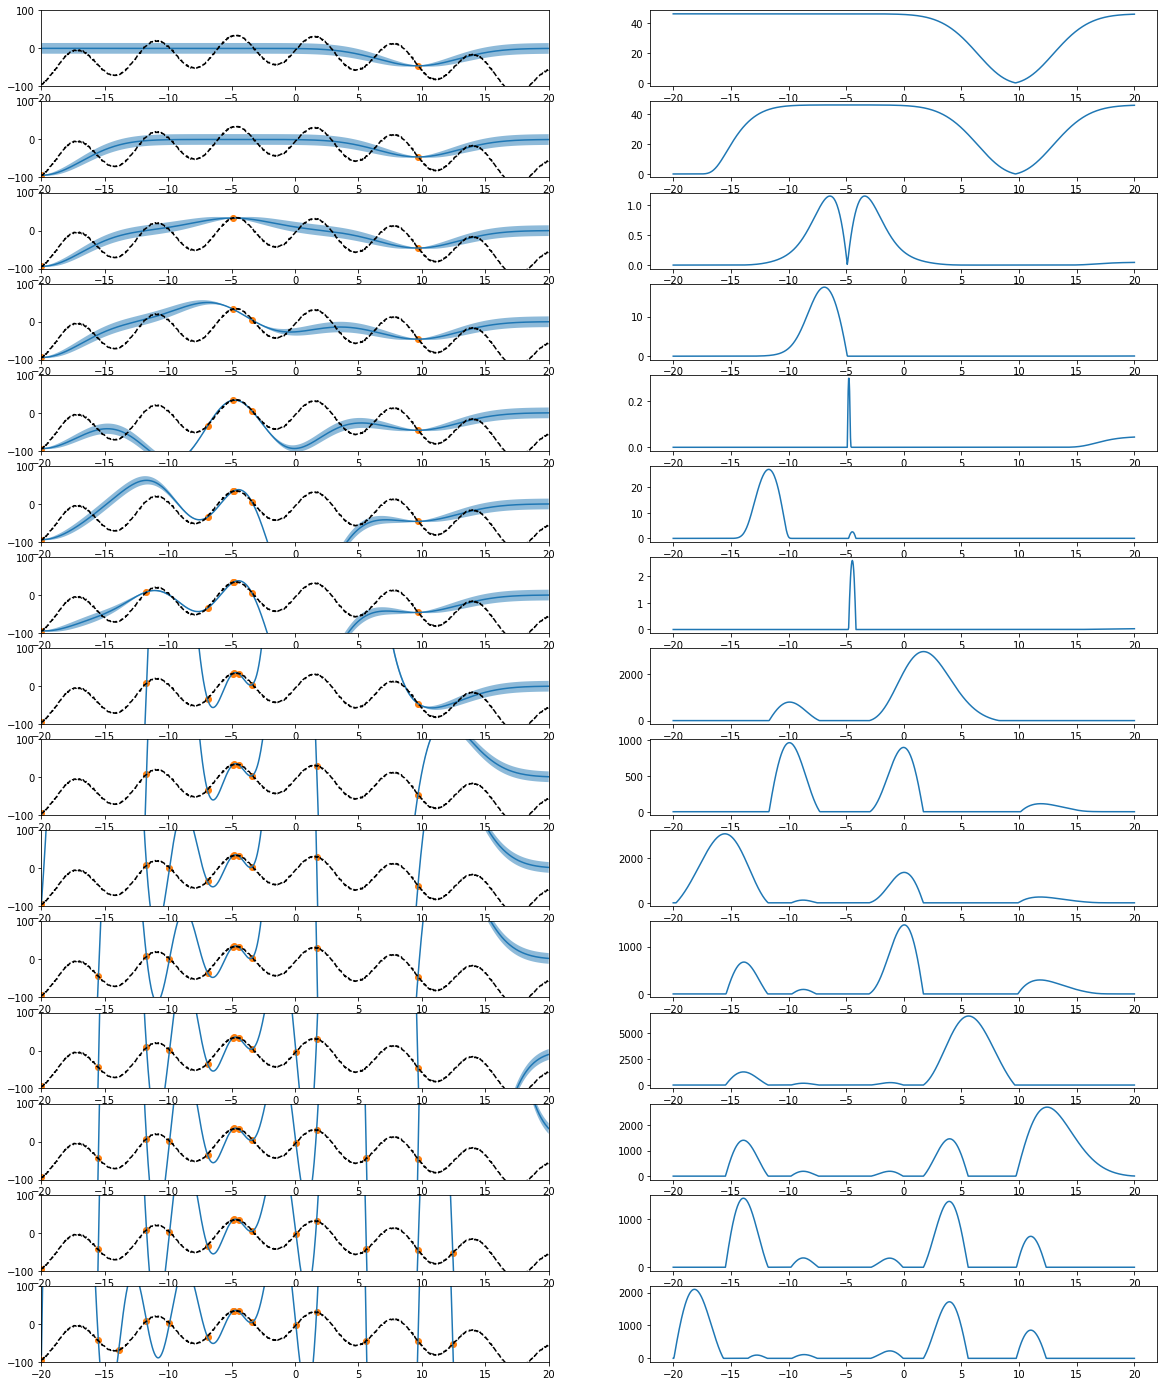

finish


In [4]:
x_sample = np.array([])
y_sample = np.array([])
x_point = np.random.uniform(-20,20)
epoch=15
maxval = 'Initial'
plt.figure(figsize=(20, 50))
for i in range(epoch):
    if x_point not in x_sample:
        x_sample = np.append(x_sample,x_point)
        print ("x_point, maxval = "+str(x_point)+',  '+str(maxval))
        y_point = generate_sample(x_point)
        y_sample = np.append(y_sample,y_point)
    mean, std = _xsample2meanvariance(x_sample, y_sample, x)
    maxval = max(y_sample)
    #accui = aqui3(mean, std, maxval) ###change this function
    #accui = aqui2(mean, std, maxval) ###change this function
    accui = aqui1(mean, std, maxval) ###change this function
#    x_point = x[maximum(accui)]+np.random.normal(0,0.01,1)
    x_point = x[np.argmax(accui)] + np.random.normal(0,0.01,1)
    if(i%1==0):
        plt.subplot(epoch*2,2,i*2+1)
        plt.plot(x,np.array(mean))
        plt.plot(x,z,'k--')
        high_bound = mean+ 1.0*std
        lower_bound = mean- 1.0*std
        plt.fill_between(x,high_bound,lower_bound, alpha=0.5)
        plt.xlim(-20,20)
        plt.ylim(-100,100)
        plt.scatter(x_sample,y_sample)
        plt.subplot(epoch*2,2,i*2+2)
        plt.plot(x,accui)
        plt.savefig("bayes_UCB.png")### change the name
#plt.legend()
plt.show()
#print "finish"
print ("finish")